# Studio 4 -- Complex Root Finding and Fractals
## Put your group number and the full names of you and your groupmates here:
### Group: #
- 1 -- Viktorya Hunanyan
- 2 -- Victor 
- 3 -- Hannah James 



In [47]:
## run this cell first to import all the necessary tools
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import newton

# Problem 1

## Complex Numbers in NumPy/Python

Unlike many programming languages, Python has a built-in complex number type.  I can express the complex number $z = 2+3i$ as:

In [50]:
z = 2 + 3j

There are technically two ways I can manipulate complex numbers in Python: I can either import the `cmath` package (the complex equivalent of the `math` package that also comes with Python), or I can use NumPy.  Let's stick with NumPy, since it contains all the same functions, and they work on single numbers and NumPy arrays

Most NumPy functions, like `sin`, `cos`, `log`, `exp`, etc. that work for real numbers work for complex numbers as well.  There are also specialized functions for complex numbers:

- `np.real` -- Returns the real part of a complex number 
- `np.imag` -- Returns the imaginary part of a complex number 
- `np.abs` -- Returns the modulus (length) of a complex number 
- `np.angle` -- Returns the argument (angle in polar coordinates) of a complex number 

## Part A) 

Take three complex numbers:

$$ z_1 = 2i,~~~~z_2 = -0.2 + 4i,~~~~z_3=6$$

Create a NumPy array containing all three numbers, and use the NumPy functions to calculate the real and imaginary parts, the modulus, and argument, of the full array

In [52]:
z_array = [2j, -0.2+4j, 6]

In [53]:
print("real", np.real(z_array))
print("imaginary", np.imag(z_array))
print("Modulus", np.abs(z_array))
print("Argument", np.angle(z_array))

real [ 0.  -0.2  6. ]
imaginary [2. 4. 0.]
Modulus [2.         4.00499688 6.        ]
Argument [1.57079633 1.62075472 0.        ]


## Part B) 

Numerically "prove" Problem 1(f) from the Homework

$$z^n = r^n(\cos n\phi + i \sin n\phi)$$

by calculating both sides and asking whether the two arrays you get are equal.  Pick a random $n$ (other than 0) to test this against.

**HINT**: Try both printing out the left and right hand sides **and** testing for equality by using `==`.  

In [77]:
## Put answer here
n = 2
r = np.abs(z_array)
phi = np.angle(z_array)
y = np.array(z_array)

first_func = y ** n 
sec_func = (r ** n) * (np.cos(n*phi) + 1j * np.sin(n*phi))

print(f"z^n = {first_func}")
print(f"(r^n)(cos(n*phi) + isin(n*phi)) = {sec_func}")

print(np.array(first_func == sec_func))

z^n = [ -4.  +0.j  -15.96-1.6j  36.  +0.j ]
(r^n)(cos(n*phi) + isin(n*phi)) = [ -4.  +4.8985872e-16j -15.96-1.6000000e+00j  36.  +0.0000000e+00j]
[False False  True]


What causes this disagreement?  **When testing for equality the left and right hand sides should not be equal because they use imaginary numbers. However, the 3rd number has no imaginary values, meaning that there is equality.**

## Part C) 

If I want to evaluate a function for many complex numbers, I can't use `np.linspace` or `np.arange`, I need some way to create a **grid of complex numbers**.

Create a 200x200 grid of complex numbers.  The real part should go from $-10$ to $10$, and the imaginary part from $-10i$ to $10i$

**HINT**: I've given you below the code to create a blank 200x200 grid of zeros that you can fill in with complex numbers.  For NumPy arrays, a 2D array is accesed by `array[row][column]`.  For our purposes, let's have the rows of our matrix be the imaginary axis and the columns be the real part (e.g. if `array[row][column]=0.5+0.5i`, then `array[row+1][column] = 0.5+(0.5+0.1)i`, and so on)

In [99]:
real_part = np.linspace(-10,10,200)
imag_part = np.linspace(-10j,10j,200)
grid = np.zeros(shape=(200,200),dtype=np.complex128)

for column in range(200): 
    for row in range(200): 
        grid[row][column] = real_part[column] + imag_part[row]

print(grid)

[[-10.        -10.j          -9.89949749-10.j
   -9.79899497-10.j         ...   9.79899497-10.j
    9.89949749-10.j          10.        -10.j        ]
 [-10.         -9.89949749j  -9.89949749 -9.89949749j
   -9.79899497 -9.89949749j ...   9.79899497 -9.89949749j
    9.89949749 -9.89949749j  10.         -9.89949749j]
 [-10.         -9.79899497j  -9.89949749 -9.79899497j
   -9.79899497 -9.79899497j ...   9.79899497 -9.79899497j
    9.89949749 -9.79899497j  10.         -9.79899497j]
 ...
 [-10.         +9.79899497j  -9.89949749 +9.79899497j
   -9.79899497 +9.79899497j ...   9.79899497 +9.79899497j
    9.89949749 +9.79899497j  10.         +9.79899497j]
 [-10.         +9.89949749j  -9.89949749 +9.89949749j
   -9.79899497 +9.89949749j ...   9.79899497 +9.89949749j
    9.89949749 +9.89949749j  10.         +9.89949749j]
 [-10.        +10.j          -9.89949749+10.j
   -9.79899497+10.j         ...   9.79899497+10.j
    9.89949749+10.j          10.        +10.j        ]]


Save this grid!  We're going to use it below

# Problem 2

## Root Finding for Complex Functions

In HW04, you implemented a 2D Newton-Raphson algorithm using a Jacobian inverse.  But you may have realized that, for a complex function, we don't actually need to compute the derivatives separately; we can also just calculate the derivative of a function 

$$f(z) = z^3 - 1$$

as 

$$f'(z) = 3z^2$$

This means for complex functions, if we have a programming language that can handle complex numbers (like Python), we can just use 1D Newton-Raphson

## Part A)

Just as we did in the last studio, use SciPy's Newton function to compute the roots of the above function, by coding up $$f(z)$$ and it's derivative $$f'(z)$$But this time, use the 1D complex function above and it's derivative.  Have the `newton` function calculate the root of **every** point in your grid.  Like most NumPy/SciPy functions, this can be done in a single line with no `for` loops.

In [103]:
import numpy as np
from scipy import optimize

def cfunc(z):
    '''
    The complex function f(z) = z^3 - 1
        
    PARAMETERS:
        z - Complex Number
    
    RETURN VALUE:
        Value of Function
    '''
    return z**3 - 1

def dcfunc(z):
    '''
    The derivative of the complex function f(z) = z^3 - 1
        
    PARAMETERS:
        z - Complex Number
    
    RETURN VALUE:
        Value of derivative at z
    '''
    return 3*z**2

# Generate a grid of real and imaginary values separately
real_vals = np.linspace(-2, 2, 1000)
imag_vals = np.linspace(-2, 2, 1000)

# Create a mesh grid
mesh = np.meshgrid(real_vals, imag_vals)

# Unpack the real and imaginary parts
real = mesh[0]
imag = mesh[1]

# Combine real and imaginary parts into a grid of complex numbers
grid = real + 1j * imag

# Apply the Newton-Raphson method over the grid
roots = optimize.newton(cfunc, grid, fprime=dcfunc, maxiter=1

## Part B)

As you did in the Homework, each of the points should find a different root, but there should only be handful of unique roots for the given function.  Using the `np.unique` function, how many roots does your grid produce?  Looking at the output, how many **actually** unique roots are there.

**Note:** You may want to increase the max number of iterations to 200

In [106]:
unique_roots = np.unique(roots.round(decimals=5))  # Rounding for numerical precision

print(f"Number of unique roots (after rounding): {len(unique_roots)}")
print("Unique roots found:", unique_roots)

Number of unique roots (after rounding): 3
Unique roots found: [-0.5-0.86603j -0.5+0.86603j  1. +0.j     ]


**Put your text answer here**

## Part C)

Let's plot in the complex plane what root each of your input grid points actually converges to.  **Using the provided function**, convert your grid of roots into unique colors, and plot them using the `plt.imshow` function

In [110]:
import matplotlib.pyplot as plt

def root_to_color(grid_of_roots,unique_roots):
    '''
    Function to map each root from grid_of_roots to a color, 
    based on which root in unique_roots it's closest to.
        
    PARAMETERS:
        grid_of_roots - 2D np.array of all the roots of your grid
        unique_roots - 1D np.array or Python list of the unique roots you found above
    
    RETURN VALUE:
        colors - 2D np.array where each root that matches a root in unique_root is assigned a color
    '''
    colors = np.zeros(grid_of_roots.shape)

    idx = 0
    
    for unique_root in unique_roots:
        # For each point in the grid, if it's close to this unique root, assign the corresponding color index
        this_root = (idx + 1) * np.isclose(grid_of_roots, unique_root, atol=1e-5).astype(int)
        colors += this_root
        idx += 1  # Increment the index manually
    
    return colors


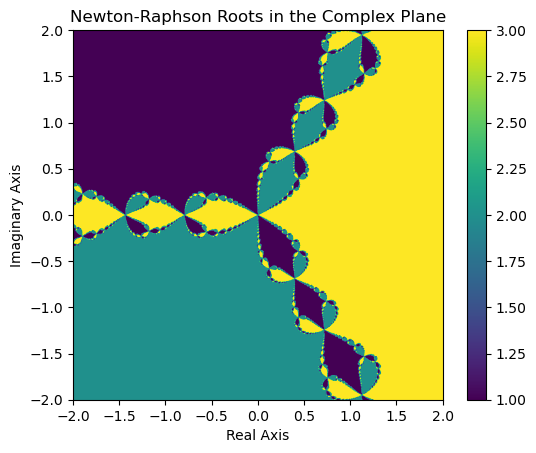

In [112]:
colors = root_to_color(roots, unique_roots)

# Plot the result using plt.imshow
plt.imshow(colors, extent=(-2, 2, -2, 2))
plt.colorbar()
plt.title("Newton-Raphson Roots in the Complex Plane")
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.show()

Just based on the names of the function, what do you think the above function is actually doing?

**Based on its name, this function appears to map the roots of the Newton-Raphson iterations to colors. The grid of roots likely contains the roots that were computed at each point, and unique_roots would contain the distinct roots of the function. The function seems to assign a specific color to each unique root.**